# Exploratory Data Analysis on Churn Dataset


## Importing Libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('Abandono_clientes.csv')

# Dropping unnecessary columns for the EDA
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for null values in each column
print("\nNull Values in Each Column:")
print(df.isnull().sum())



Null Values in Each Column:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Not even a single null value, that's good.


### What is Churn?
First of all, I want to explain what is churn.
According to RD Station (Marketing Company)<a name="cite_ref-1"></a>[<sup>[1]</sup>](https://www.rdstation.com/blog/marketing/o-que-e-churn/), Churn is a metric that indicates the number of customers who exited a company or a service in a given period of time. Churn rate can be an indicator of how satisfied customers are with a product or service. An increase in churn rate almost always suggests problems.

Now that we understand what is Churn, let's understand more our data.


#### Explaining the variables:

* CreditScore: Score that represents the creditworthiness of the customer. Higher scores indicate better financial responsibility and reliability.
* Geography: The country or region where the customer resides. [France, Germany, Spain]
* Gender: The gender of the customer.
* Age: The age of the customer in years.
* Tenure: The number of years the customer has been with the company.
* Balace: The amount of money the customer has in their account.
* NumOfProducts: The number of products the customer has purchased.
* HasCrCard: Indicates whether the customer has a credit card or not.
* IsActiveMember: Indicates whether the customer is an active member or not.
* EstimatedSalary: Estimated annual salary of the customer.
* Exited: Indicates whether the customer has exited the company or not. (Churn)

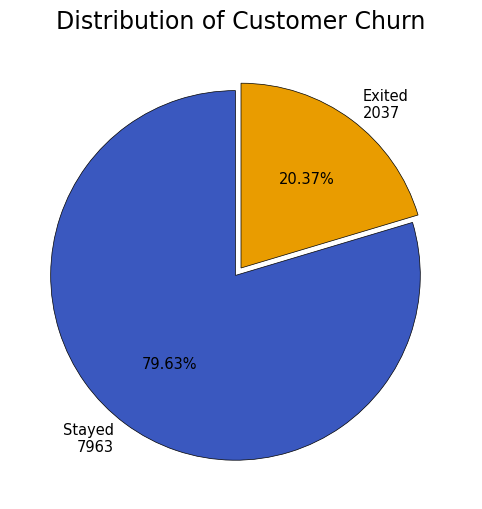

In [4]:
# Create a pie chart for the 'Exited' column distribution
plt.figure(figsize=(8, 6))
exited_counts = df['Exited'].value_counts()
labels = ['Stayed', 'Exited']
values = exited_counts.values
percentages = (values / len(df) * 100).round(2)

plt.pie(values, labels=[f'{labels[i]}\n{values[i]}' for i in range(len(labels))], 
        autopct='%1.2f%%', startangle=90, explode=[0.05, 0],
        textprops={'fontsize': 10.5}, colors=['#3a58bf', '#e99c00'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5, 'antialiased': True})
plt.title('Distribution of Customer Churn', fontsize=17)
plt.show()


As we can see, our churn rate is around 20%, which is high and we need to understand how this is happening. Clearly there is a class imbalance, but that's okay.


In [5]:
# Converting Gender column to binary: Male=1, Female=0
df_corr = df.copy()
df_corr['Male'] = np.where(df_corr['Gender'] == 'Male', 1, 0)
df_corr.drop('Gender', axis=1, inplace=True)

# One-hot encoding for Geography column
geography_dummies = pd.get_dummies(df_corr['Geography'], prefix='Geo', dtype=int)
df_corr = pd.concat([df_corr, geography_dummies], axis=1)
df_corr.drop('Geography', axis=1, inplace=True)


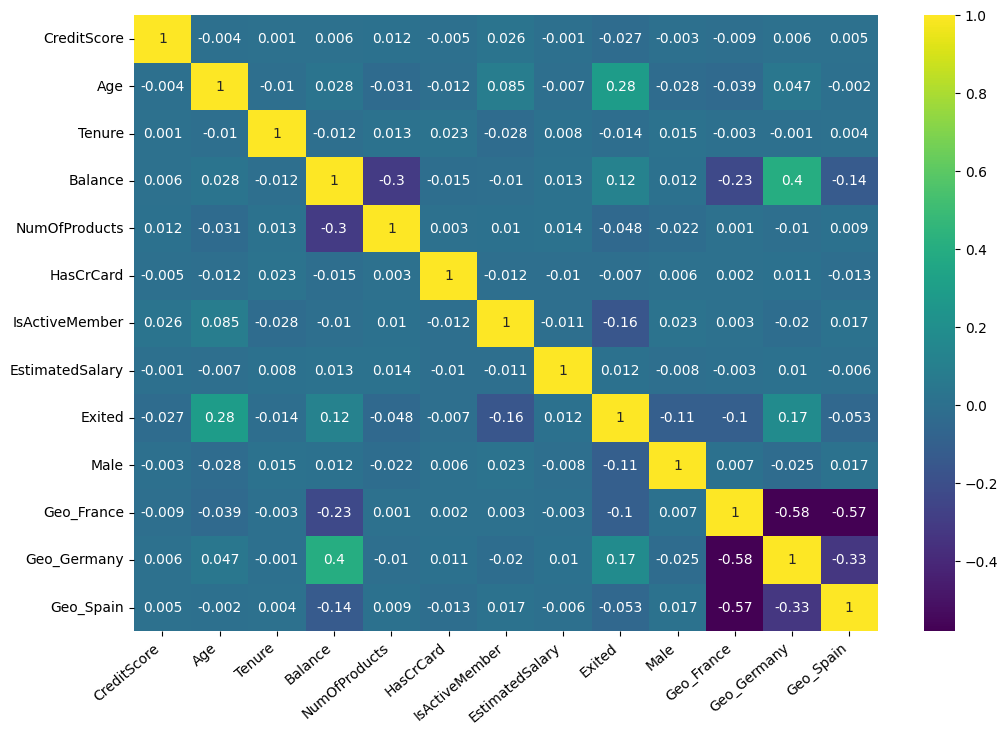

In [6]:
# Plotting a heatmap of the correlations looking for relations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr().round(3),
            annot=True,
            cmap='viridis')
plt.xticks(rotation=40, ha='right');

* An important point that we can observe is that the variable Exited (our dependent variable) has a weak positive correlation with Age (**0.28**), that is, as the person ages, it correlates with their exit.
* Apparently the country with the highest Balance is Germany, since the correlation between the two variables is moderate (**0.4**) and it was showed previously
* Exited has very weak correlation between Genders (**-0.11**, as is negative, Exited increases and Male decreases, it means the Female has more chances of leaving)



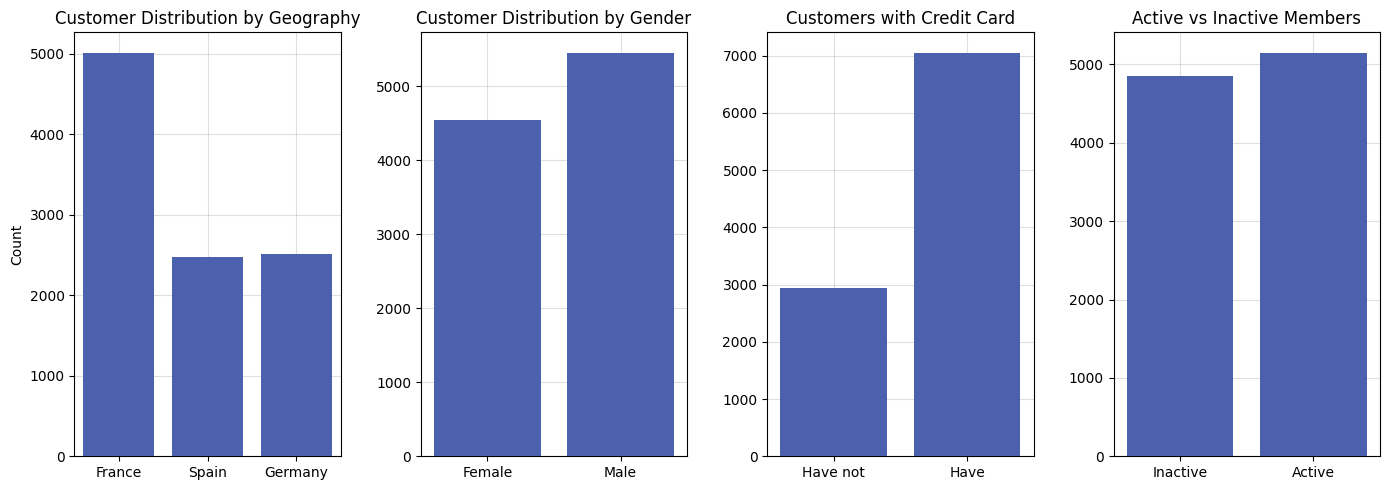

In [7]:
# Create a figure with subplots for categorical variables
plt.figure(figsize=(14, 5))

# Geography distribution
plt.subplot(141)
sns.countplot(data=df, x='Geography', color='#3a58bf', zorder=10)
plt.title('Customer Distribution by Geography')
plt.xlabel('')
plt.ylabel('Count')
plt.grid(zorder=10, alpha=.4)
plt.xticks(rotation=0)

# Gender distribution 
plt.subplot(142)
sns.countplot(data=df, x='Gender', color='#3a58bf', zorder=10)
plt.title('Customer Distribution by Gender')
plt.xlabel('')
plt.ylabel('')
plt.grid(zorder=10, alpha=.4)

# HasCrCard distribution
plt.subplot(143)
sns.countplot(data=df, x='HasCrCard', color='#3a58bf', zorder=10)
plt.title('Customers with Credit Card')
plt.xlabel('')
plt.ylabel('')
plt.grid(zorder=10, alpha=.4)
plt.xticks([0, 1], ['Have not', 'Have'])

# IsActiveMember distribution
plt.subplot(144)
sns.countplot(data=df, x='IsActiveMember', color='#3a58bf', zorder=10)
plt.title('Active vs Inactive Members')
plt.xlabel('')
plt.ylabel('')
plt.grid(zorder=10, alpha=.4)
plt.xticks([0, 1], ['Inactive', 'Active'])

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


* Most part of the clients are from France
* The distribution between Male and Female is balanced
* More than 70& of the customers have Credit Card
* Active and Inactive members are very balanced

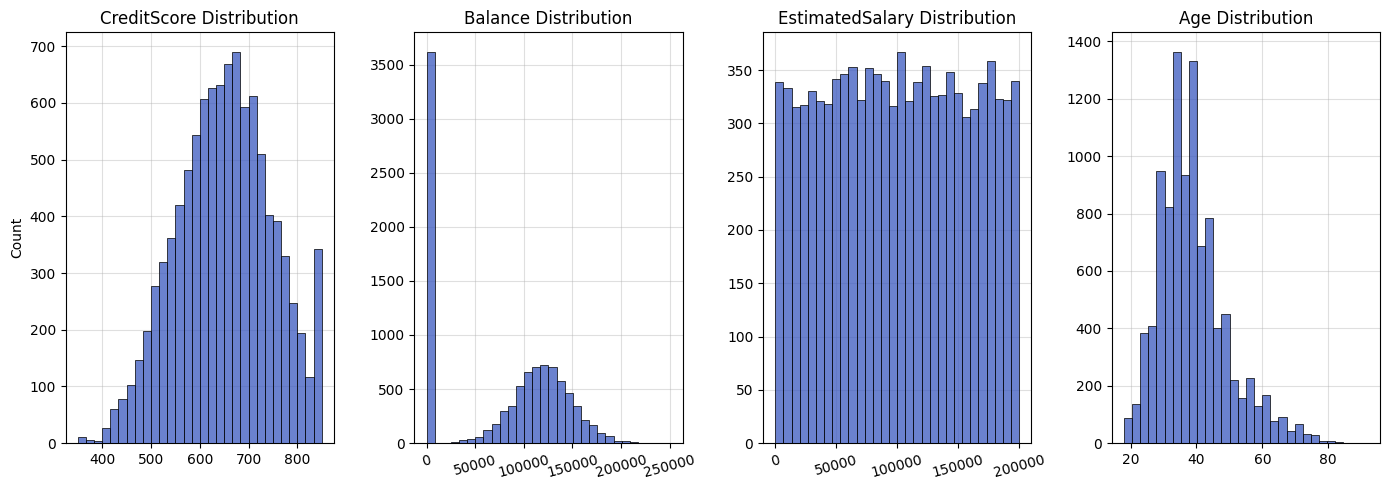

In [8]:
plt.figure(figsize=(14, 5))

# CreditScore
plt.subplot(141)
sns.histplot(data=df, x='CreditScore', color='#3a58bf', bins=30, zorder=10)
plt.title('CreditScore Distribution')
plt.xlabel('')
plt.grid(alpha=.4, zorder=-10)

# Balance 
plt.subplot(142)
sns.histplot(data=df, x='Balance', color='#3a58bf', bins=30, zorder=10)
plt.title('Balance Distribution')
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

# EstimatedSalary
plt.subplot(143)
sns.histplot(data=df, x='EstimatedSalary', color='#3a58bf', bins=30, zorder=10)
plt.title('EstimatedSalary Distribution')
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

# Age
plt.subplot(144)
sns.histplot(data=df, x='Age', color='#3a58bf', bins=30, zorder=10)
plt.title('Age Distribution')
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


In [9]:
df[['CreditScore', 'Balance', 'EstimatedSalary', 'Age']].describe()

,CreditScore,Balance,EstimatedSalary,Age
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,100090.239881,38.921800
std,96.653299,62397.405202,57510.492818,10.487806
min,350.000000,0.000000,11.580000,18.000000
25%,584.000000,0.000000,51002.110000,32.000000
50%,652.000000,97198.540000,100193.915000,37.000000
75%,718.000000,127644.240000,149388.247500,44.000000
max,850.000000,250898.090000,199992.480000,92.000000


* Credit Score Distribution:
  * The distribution is approximately normal, with a peak close to 700, so the biggest part of the clients has a good CreditScore
  * Outliers seem to exist at both lower and higher extremes, particularly near 400 and above 800.
* Balance Distribuion:
  * The significant spike at 0 indicates a huge number of customers with no balance.
  * The remaining balance values form a roughly normal distribution, centered near 125,000.
* Estimated Salary Distribution:
  * The distribution is uniform, with nearly equal frequency across the range of salaries.
  * There are no visible outliers or skewness in this data.

### Investigating the behavior of numeric variables across countries


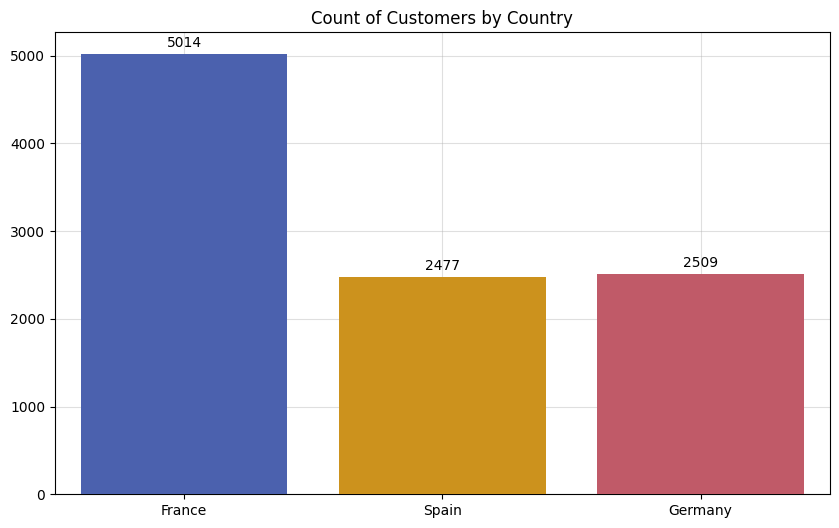

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geography', zorder=10, palette=['#3a58bf', '#e99c00', '#d1495b'])
plt.title('Count of Customers by Country')
plt.grid(alpha=.4, zorder=-10)
plt.xlabel('')
plt.ylabel('')

for i in plt.gca().containers:
    plt.bar_label(i, fmt='%.0f', padding=3)

plt.show()


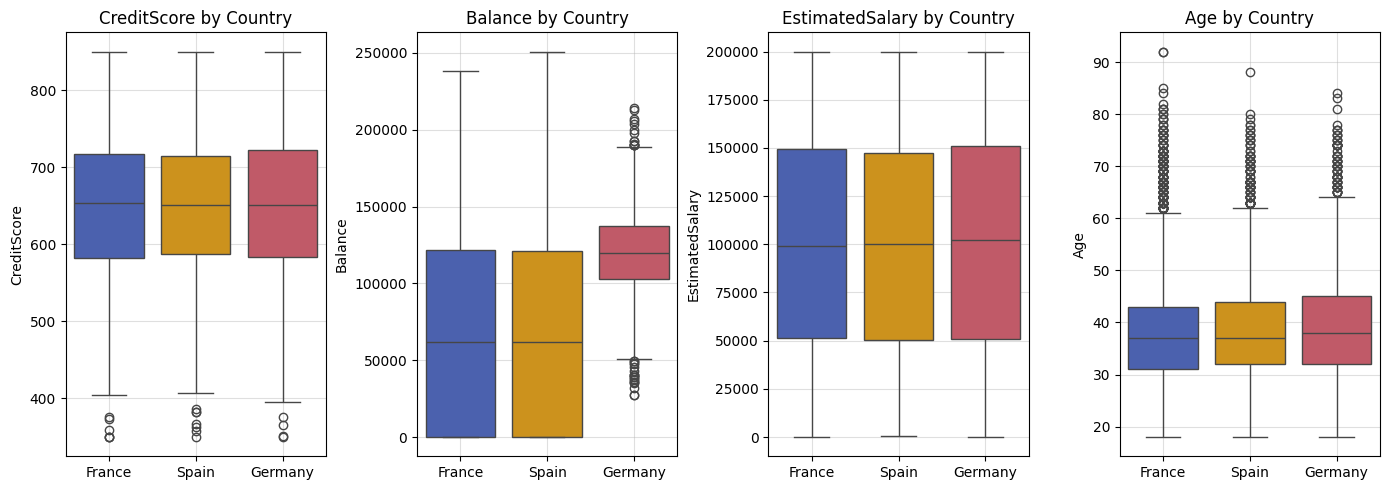

In [11]:
plt.figure(figsize=(14, 5))

# CreditScore
plt.subplot(141)
sns.boxplot(data=df, x='Geography', y='CreditScore', palette=['#3a58bf', '#e99c00', '#d1495b'])
plt.title('CreditScore by Country')
plt.xlabel('')
plt.grid(alpha=.4)

# Balance
plt.subplot(142)
sns.boxplot(data=df, x='Geography', y='Balance', palette=['#3a58bf', '#e99c00', '#d1495b'])
plt.title('Balance by Country')
plt.xlabel('')
plt.grid(alpha=.4)

# EstimatedSalary
plt.subplot(143)
sns.boxplot(data=df, x='Geography', y='EstimatedSalary', palette=['#3a58bf', '#e99c00', '#d1495b'])
plt.title('EstimatedSalary by Country')
plt.xlabel('')
plt.grid(alpha=.4)

# Age
plt.subplot(144)
sns.boxplot(data=df, x='Geography', y='Age', palette=['#3a58bf', '#e99c00', '#d1495b'])
plt.title('Age by Country')
plt.xlabel('')
plt.grid(alpha=.4)

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()


* Credit Score:
  * France has a distribution relatively symmetrical with some outliers below 500.
  * Spain has the lowest median among the countries, but still very close to others.
  * Even with France having more customers, the distribution between each country is similar
* Balance:
  * France has the lowest median among the countries, but still very close to Spain.
  * Germany has the highest median among the countries by far and its distribution is more compact, suggesting customers have similar balance amounts.
  * One important fact to comment is that no Germany customer has balance equal to 0
* Estimated Salary:
  * As we could see in the histogram previously is pretty uniform even among the three countries
* Age:
  * We could see a little stair in the distributions, suggesting that France is younger along its distribution among the countries and germany is a little older

### Investigating the behavior of the variables with Exited

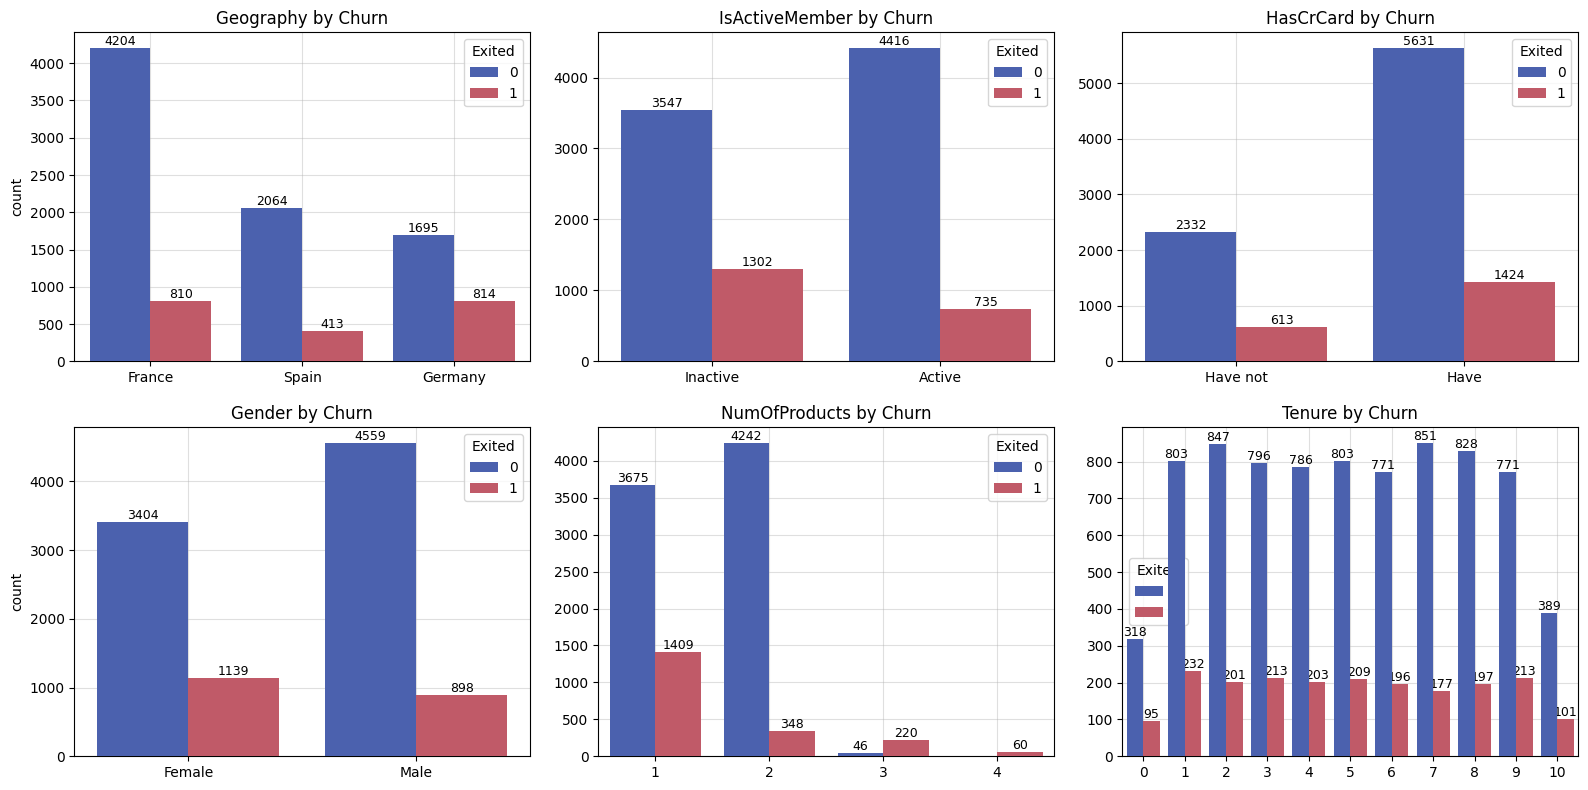

In [47]:
plt.figure(figsize=(16, 8))

# Geography
plt.subplot(231)
ax = sns.countplot(data=df, x='Geography', hue='Exited', palette=['#3a58bf', '#d1495b'], zorder=10)
plt.title('Geography by Churn')
plt.xlabel('')
plt.grid(alpha=.4, zorder=-10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

# IsActiveMember 
plt.subplot(232)
ax = sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette=['#3a58bf', '#d1495b'], zorder=10)
plt.title('IsActiveMember by Churn')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

# HasCrCard
plt.subplot(233)
ax = sns.countplot(data=df, x='HasCrCard', hue='Exited', palette=['#3a58bf', '#d1495b'], zorder=10)
plt.title('HasCrCard by Churn')
plt.xticks([0, 1], ['Have not', 'Have'])
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

# Gender
plt.subplot(234)
ax = sns.countplot(data=df, x='Gender', hue='Exited', palette=['#3a58bf', '#d1495b'], zorder=10)
plt.title('Gender by Churn')
plt.xlabel('')
plt.grid(alpha=.4, zorder=-10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

# NumOfProducts
plt.subplot(235)
ax = sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette=['#3a58bf', '#d1495b'], zorder=10)
plt.title('NumOfProducts by Churn')
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.subplot(236)
ax = sns.countplot(data=df, x='Tenure', hue='Exited', palette=['#3a58bf', '#d1495b'], zorder=10)
plt.title('Tenure by Churn')
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.2)
plt.show()


* Germany shows the biggest number of exited people, numerically and proportionally
* Naturally, Is Active Member shows that the chance of losing the customer is bigger when the customer is inactive
* The Gender attribute also show a big impact that was commented on the Correlation Heatmap that more woman exited than man, numerically and mainly proportionally
* Analysing Number of Products is interesting. The bar plot suggests that as the customer buys more products, the chance of him exit the company decreases

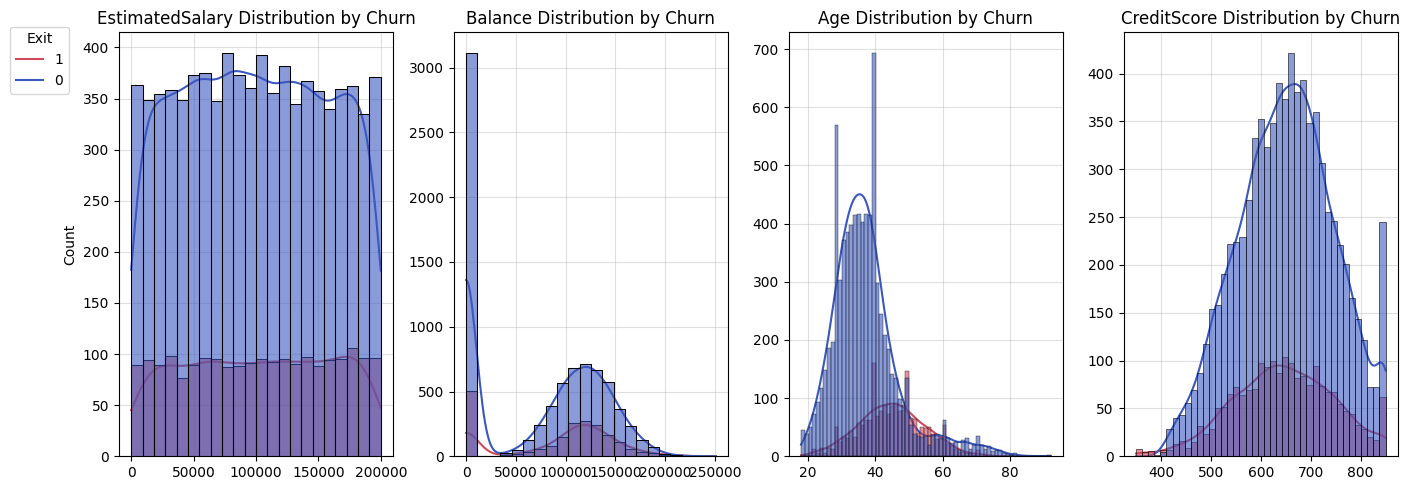

In [79]:
plt.figure(figsize=(15, 5))

# EstimatedSalary
plt.subplot(141)
ax1 = sns.histplot(data=df, x='EstimatedSalary', hue='Exited', palette=['#3a58bf', '#d1495b'], multiple="layer", alpha=0.6, zorder=10, kde=True, legend=False)
plt.title('EstimatedSalary Distribution by Churn')
plt.xlabel('')
plt.grid(alpha=.4, zorder=-10)

# Balance
plt.subplot(142)
ax2 = sns.histplot(data=df, x='Balance', hue='Exited', palette=['#3a58bf', '#d1495b'], multiple="layer", alpha=0.6, zorder=10, kde=True, legend=False)
plt.title('Balance Distribution by Churn')
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

# Age
plt.subplot(143)
ax3 = sns.histplot(data=df, x='Age', hue='Exited', palette=['#3a58bf', '#d1495b'], multiple="layer", alpha=0.6, zorder=10, kde=True, legend=False)
plt.title('Age Distribution by Churn')
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

# CreditScore
plt.subplot(144)
ax4 = sns.histplot(data=df, x='CreditScore', hue='Exited', palette=['#3a58bf', '#d1495b'], multiple="layer", alpha=0.6, zorder=10, kde=True, legend=False)
plt.title('CreditScore Distribution by Churn')
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

# Add a single legend for all subplots
plt.figlegend(title='Exit', labels=[1,0], loc='center left', bbox_to_anchor=(-0.03, 0.87))

plt.tight_layout()
plt.subplots_adjust(wspace=0.22, hspace=0.2, right=0.9)
plt.show()


* Both churned and non-churned groups share a similar shape in distribution.
* Apparently, the customer with balance equals to 0, the churn chance is smaller
* Churn is more prevalent among customers in their late 40s and early 50s, as indicated by the red peaks overlapping the blue distribution.
* Younger and older customers are less likely to churn compared to middle-aged customers.
